In [ ]:
Linear Regression: Human Brain Weight 🧠

This dataset was compiled using a medical study conducted on a group of people. This dataset shows a few variations of head sizes and masses of brains, it also consists additional gender and age group columns. The goal of the study is to predict the masses of the brains using the data, and later compare it with the actual masses of brains mentioned in the dataset.

In [13]:
# Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd  
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
df = pd.read_csv("dataset.csv")
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [17]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [19]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [25]:
df.columns = ['Gender', 'Age Range', 'Head Size', 'Brain Weight']
df.columns

Index(['Gender', 'Age Range', 'Head Size', 'Brain Weight'], dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        237 non-null    int64
 1   Age Range     237 non-null    int64
 2   Head Size     237 non-null    int64
 3   Brain Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [ ]:
#  Data Preprocessing

In [29]:
# Null elements
df.isnull().sum()

Gender          0
Age Range       0
Head Size       0
Brain Weight    0
dtype: int64

In [ ]:
# Exploratory Data Analysis (EDA)

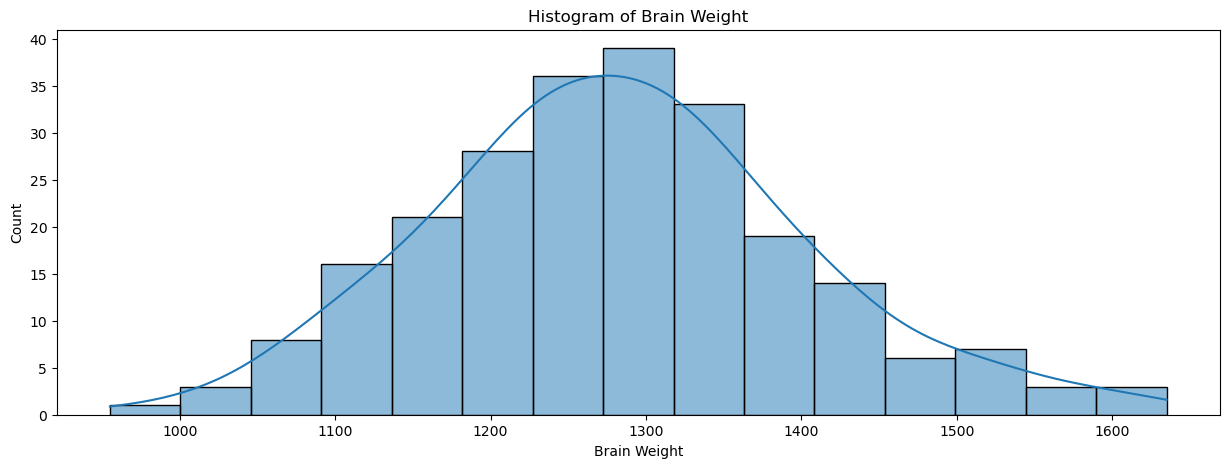

In [57]:
plt.figure(figsize=(15,5))
plt.title('Histogram of Brain Weight')
sns.histplot(data=df, x='Brain Weight', kde=True, bins=15);

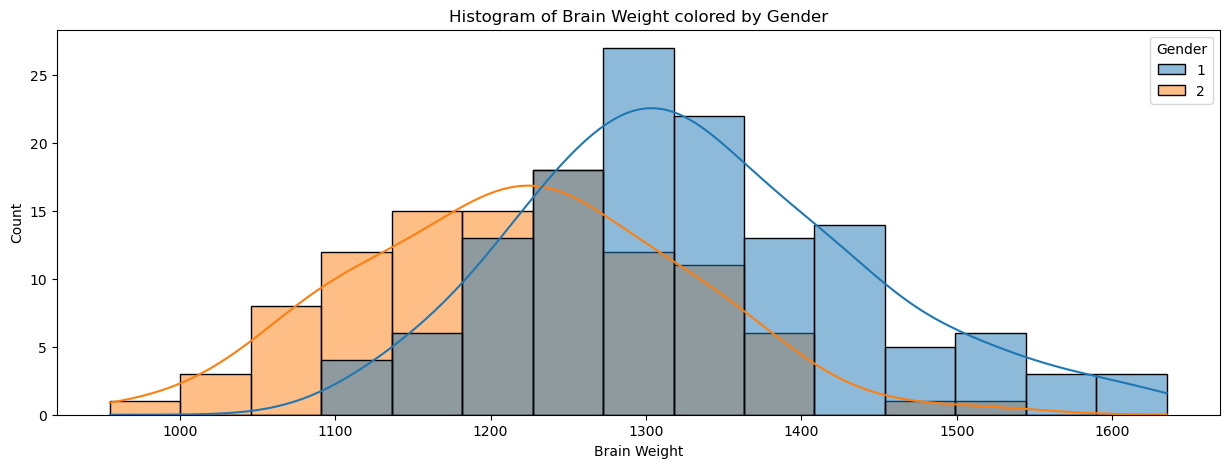

In [73]:
# Histogram of the target, colored by 'Gender'
plt.figure(figsize=(15,5))
plt.title('Histogram of Brain Weight colored by Gender')
sns.histplot(data=df, x='Brain Weight', hue='Gender', kde=True, bins=15, palette='tab10');

In [ ]:
Observation : Males seem to have (slightly) heavier brains than females.

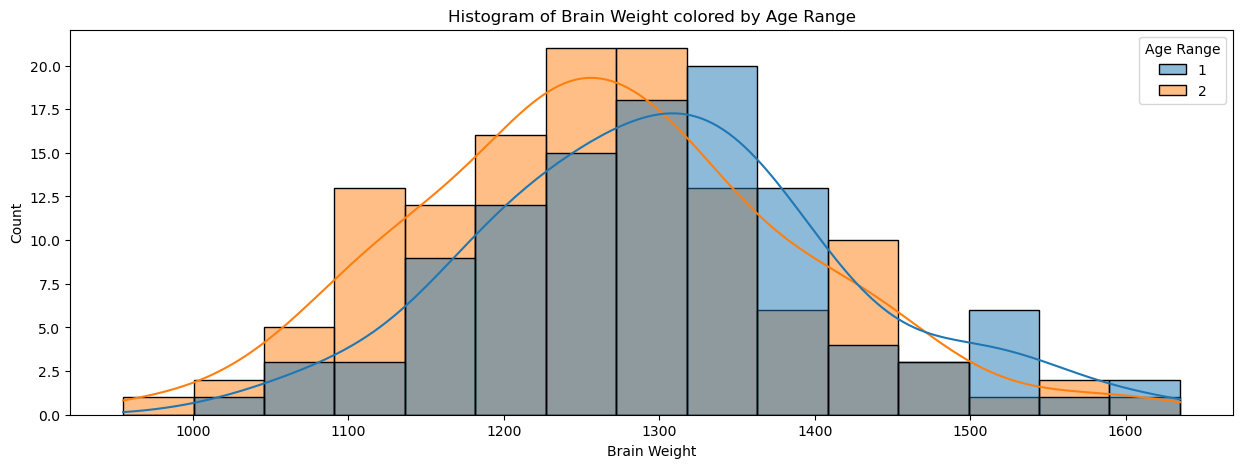

In [77]:
# Histogram of the target, colored by 'Age Range'
plt.figure(figsize=(15,5))
plt.title('Histogram of Brain Weight colored by Age Range')
sns.histplot(data=df, x='Brain Weight', hue='Age Range', kde=True, bins=15, palette='tab10');

Observation : 18-years and above might have (slightly) heavier brains.

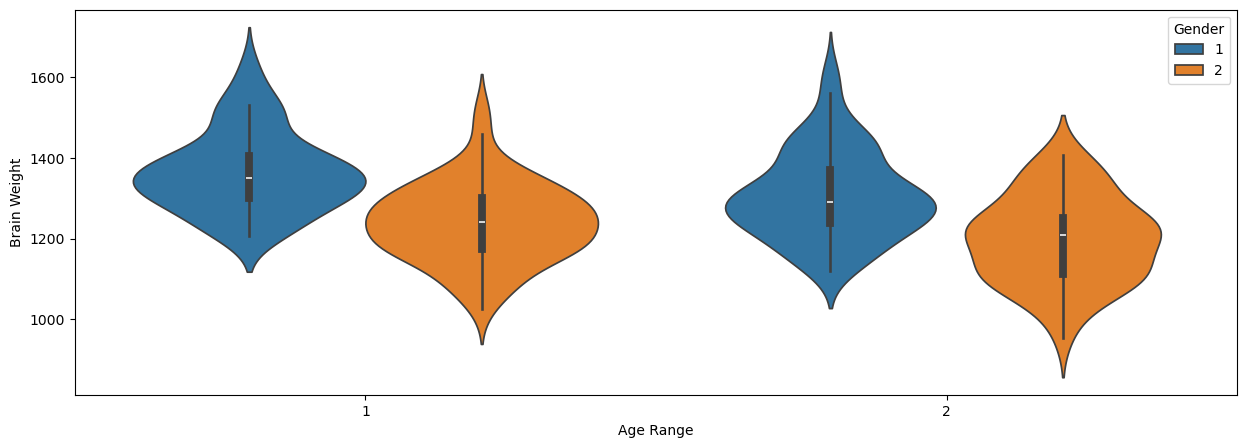

In [79]:
# Violinplot of the target, with the focus on both 'Gender' and 'Age Range'
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='Age Range', y='Brain Weight', hue='Gender', palette='tab10');

Observation : Again (seen with a mixed-effects perspective), it seems that 18 years and above have (slightly) heavier brains.
Moreover, again, males have (slightly) heavier brains than females.

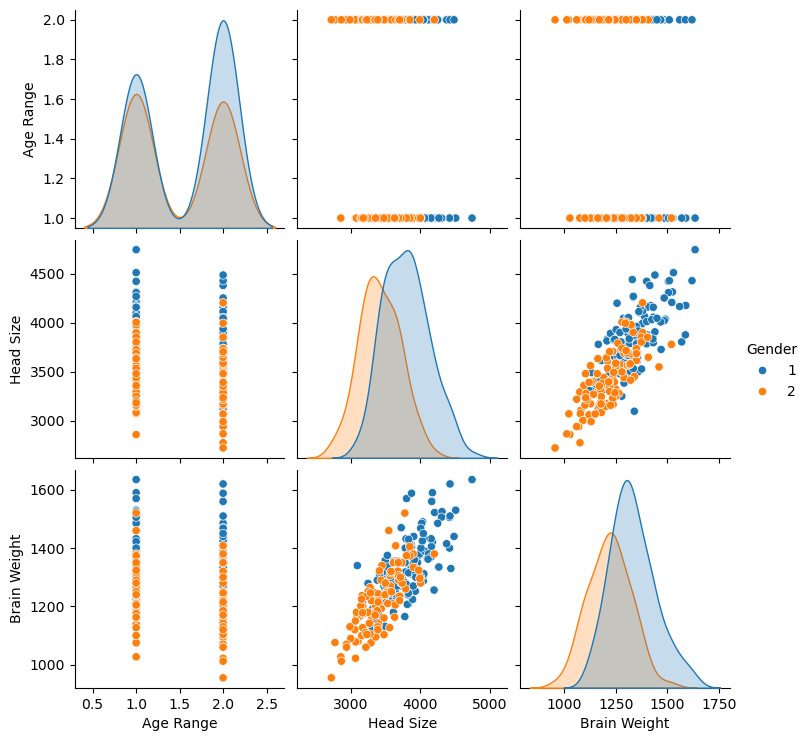

In [89]:
# Pairplot colored by 'Gender'
sns.pairplot(df, hue='Gender', palette='tab10');

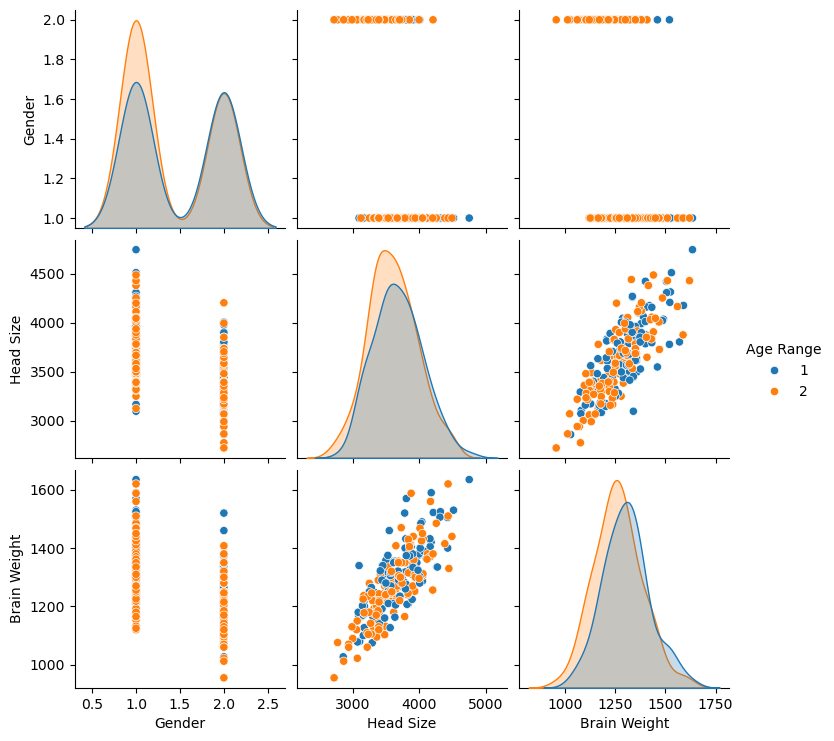

In [93]:
# Pairplot colored by 'Age Range'
sns.pairplot(df, hue='Age Range', palette='tab10');

In [ ]:
# Feature Selection

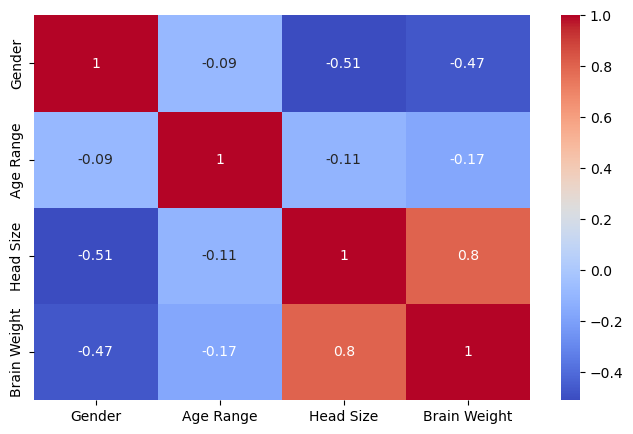

In [95]:
correlation_matrix = df.corr().round(2)

plt.figure(figsize=(8,5));
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm');

The correlation coefficient ranges from -1 to 1:

* if the value is close to 1 there is a strong positive correlation between the two variables
* if the value is close to -1, the variables have a strong negative correlation

To fit a linear regression model, we select those features which have a high correlation with our target variable.
An important point in selecting features for a linear regression model is to check for multi-co-linearity.

By looking at the correlation matrix we can see that the variable that is most correlated with the target (which in this case is 'Brain Weight') is 'Head Size' (0.8). The other variables are not strongly correlated with the target variable, but perhaps they are worth including in the training model. It is good that the variables are not correlated with each other: we should avoid selecting the features that are (highly) correlated together.



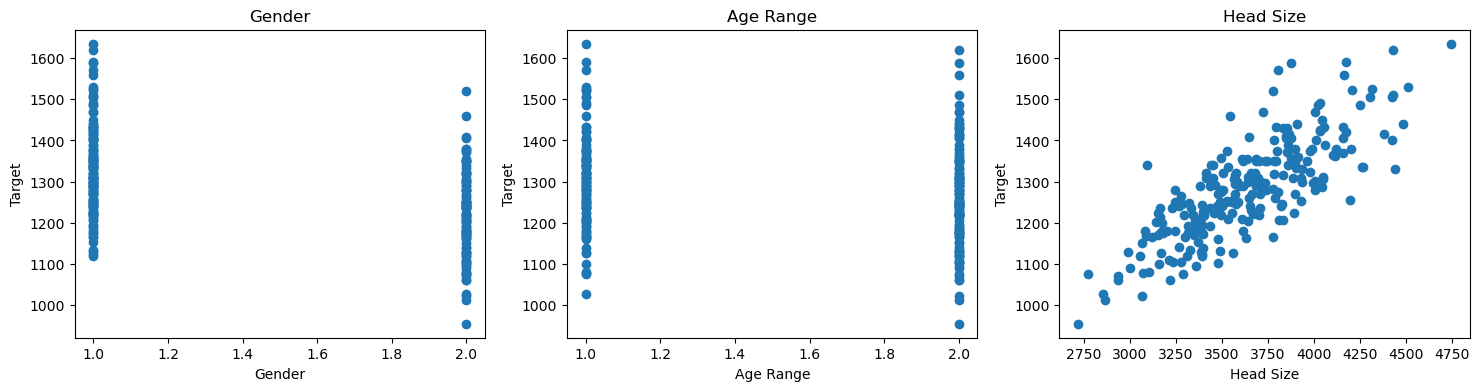

In [99]:
# Scatterplot of the features
plt.figure(figsize=(18, 4))

features = ['Gender', 'Age Range', 'Head Size']
target = df['Brain Weight']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Target')

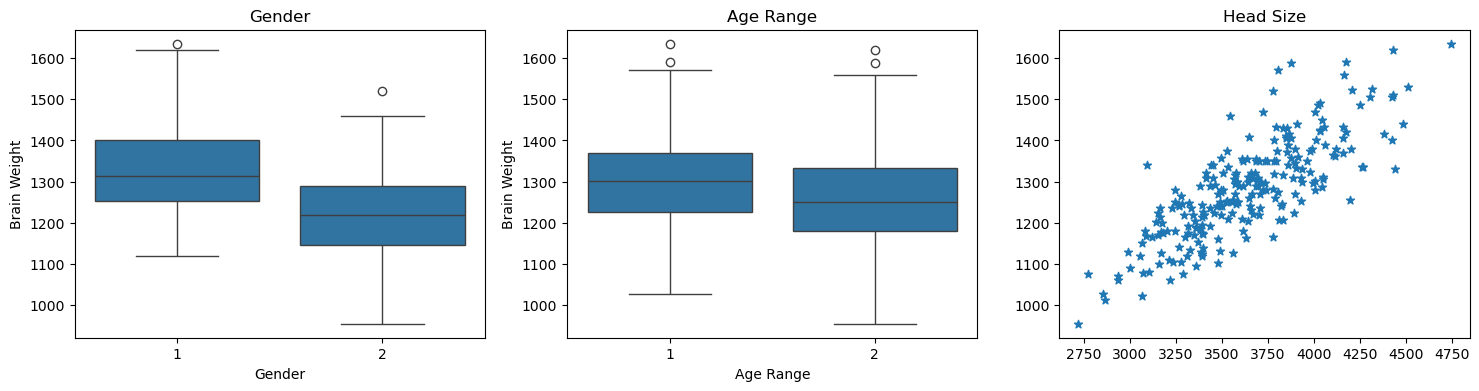

In [103]:
# It is better to consider the scatterplot only for continuous variables, 
# for categorical variables we consider a boxplot

plt.figure(figsize=(18, 4))

# Categorical
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Gender'], y=target);
plt.title('Gender');

# Categorical
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Age Range'], y=target);
plt.title('Age Range');

# Continuous
plt.subplot(1, 3, 3)
plt.scatter(x=df['Head Size'], y=target, marker='*');
plt.title('Head Size');


Insights

* It seems that gender can make some difference
* The age range does not seem to have too much of an effect on its own (as even the confusion matrix suggests), perhaps, however, interaction with the other variables may give effect (as seen in the EDA notebook)
* The brain weight increase as the value of the head size increases linearly (it looks to be following exactly a linear line)

In [ ]:
# Linear Regression with Scikit-Learn

In [105]:
# Libraries
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
# Data Preparation

In [109]:
X = df[['Gender', 'Age Range', 'Head Size']]
Y = df['Brain Weight']

In [111]:
X.dtypes

Gender       int64
Age Range    int64
Head Size    int64
dtype: object

This is not good, the 'Age Range' and the 'Gender' are not numbers that should be considered as numbers, they are categories and should therefore be dummies-converted. Actually to 'Age Range' we can apply an Ordinal-Encoding (since it makes sense to give growth meaning), while to 'Gender' we apply a One-Hot-Encoder.

In [ ]:
# One-Hot-Encoding

In [113]:
## ONE-HOT-ENCODING: 'Gender'

# Encoding
gender_encoded = OneHotEncoder().fit_transform(X[['Gender']]);

# Transform in a DataFrame
gender_encoded = pd.DataFrame(gender_encoded.toarray()).astype(int)

# Show results
gender_encoded.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [115]:
# What is the association?
X['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [117]:
# It is possible to conclude:
#   1 -> Male   -> [1, 0]
#   2 -> Female -> [0, 1]

gender_encoded.columns = ['Male', 'Female']
gender_encoded

,Male,Female
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
232,0,1
233,0,1
234,0,1
235,0,1


In [ ]:
# Ordinal-Encoding

In [119]:
## ORDINAL-ENCODING: 'Age Range' 

# Encoding
age_encoded = OrdinalEncoder().fit_transform(X[['Age Range']]);

# Transform in a DataFrame
age_encoded = pd.DataFrame(age_encoded).astype(int)

# Show results
age_encoded.head()

,0
0,0
1,0
2,0
3,0
4,0


In [121]:
# Perform a replacement to have: 0 == <18, 1 == >18
age_encoded = age_encoded.replace({0:1, 1:0})
age_encoded.head()

,0
0,1
1,1
2,1
3,1
4,1


In [123]:
# What is the association?
X['Age Range'].head()

0    1
1    1
2    1
3    1
4    1
Name: Age Range, dtype: int64

In [ ]:
# It is possible to conclude:
#   1 -> >18 -> 1
#   2 -> <18 -> 0

In [ ]:
# Update

In [125]:
# Add 'Gender' encoded
X = pd.concat([X, gender_encoded], axis=1)

# Drop the old 'Gender'  
X = X.drop('Gender', axis=1) 

# Substitute 'Age Range' with 'age_encoded'
X['Age Range'] = age_encoded

# Check
X

,Age Range,Head Size,Male,Female
0,1,4512,1,0
1,1,3738,1,0
2,1,4261,1,0
3,1,3777,1,0
4,1,4177,1,0
...,...,...,...,...
232,0,3214,0,1
233,0,3394,0,1
234,0,3233,0,1
235,0,3352,0,1


In [ ]:
# Split in train and validation

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(189, 4)
(48, 4)
(189,)
(48,)


In [ ]:
# Linear Regression with Scikit-Learn

In [129]:
# Define models
models = {
    'Linear'     : LinearRegression(),
    'Ridge'      : Ridge(),
    'Lasso'      : Lasso(),
    'ElasticNet' : ElasticNet()}

In [135]:
import numpy as np

In [137]:
def train_models(models, X_train, X_test, Y_train, Y_test):

    np.random.seed(42)

    count_models = 0 

    for name, model in models.items():

        # Training/Fitting
        model.fit(X_train, Y_train)

        # Predictions (on the training set)
        Y_pred_train = model.predict(X_train)
       
        # Metrics
        model_train_score = model.score(X_train, Y_train)
        model_test_score  = model.score(X_test, Y_test)
        model_mse         = mean_squared_error(Y_train, Y_pred_train)
        model_rmse        = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
        model_mae         = mean_absolute_error(Y_train, Y_pred_train)
        model_r2          = r2_score(Y_train, Y_pred_train)

        # If this is the first model trained we create the DataFrame 'results'
        if count_models == 0:
            results = pd.DataFrame([
                model_train_score, 
                model_test_score, 
                model_mse, 
                model_rmse, 
                model_mae, 
                model_r2],
                index = ['Train Accuracy', 'Test Accuracy', 'MSE', 'RMSE', 'MAE', 'R2'],
                columns = [name])

        # otherwise we just append the results to the already-existsing DataFrame 'results'
        else:
            results[name] = [
                model_train_score, 
                model_test_score, 
                model_mse, 
                model_rmse, 
                model_mae, 
                model_r2]

        count_models += 1
        
    print(f'Trained {count_models} models')

    return results.T


In [139]:
results = train_models(models, X_train, X_test, Y_train, Y_test)

Trained 4 models


In [141]:
# Overall results
results

,Train Accuracy,Test Accuracy,MSE,RMSE,MAE,R2
Linear,0.614110,0.776742,5403.786805,73.510454,57.113235,0.614110
Ridge,0.614105,0.776455,5403.858223,73.510939,57.101169,0.614105
Lasso,0.613298,0.770211,5415.164016,73.587798,56.962264,0.613298
ElasticNet,0.608830,0.762208,5477.733661,74.011713,57.154729,0.608830


In [143]:
metrics_to_maximize = ['Train Accuracy', 'Test Accuracy', 'R2']
metrics_to_minimize = ['MSE', 'RMSE', 'MAE']

print('Metrics to maximize: ')
results[metrics_to_maximize].style.highlight_max(color= 'lightgreen', axis=0)

Metrics to maximize: 


,Train Accuracy,Test Accuracy,R2
Linear,0.614110,0.776742,0.614110
Ridge,0.614105,0.776455,0.614105
Lasso,0.613298,0.770211,0.613298
ElasticNet,0.608830,0.762208,0.608830


In [145]:
print('Metrics to minimize: ')
results[metrics_to_minimize].style.highlight_min(color='lightgreen', axis=0)

Metrics to minimize: 


,MSE,RMSE,MAE
Linear,5403.786805,73.510454,57.113235
Ridge,5403.858223,73.510939,57.101169
Lasso,5415.164016,73.587798,56.962264
ElasticNet,5477.733661,74.011713,57.154729


 Model evaluation

Overall, the linear model is the best.

In [149]:
# Training of the model
model = LinearRegression()
model.fit(X_train, Y_train);

In [151]:
# Coefficients analysis

coefficients = {}

# Save the coefficients
for i in range(len(model.coef_)):
    coefficients[X.columns[i]] = model.coef_[i]

# Add the intercept
coefficients['Intercept'] = model.intercept_

In [153]:
coefficients_dataframe = pd.DataFrame(coefficients.values()).T
coefficients_dataframe.columns = coefficients.keys()
coefficients_dataframe

,Age Range,Head Size,Male,Female,Intercept
0,22.562647,0.242566,7.104745,-7.104745,393.024595


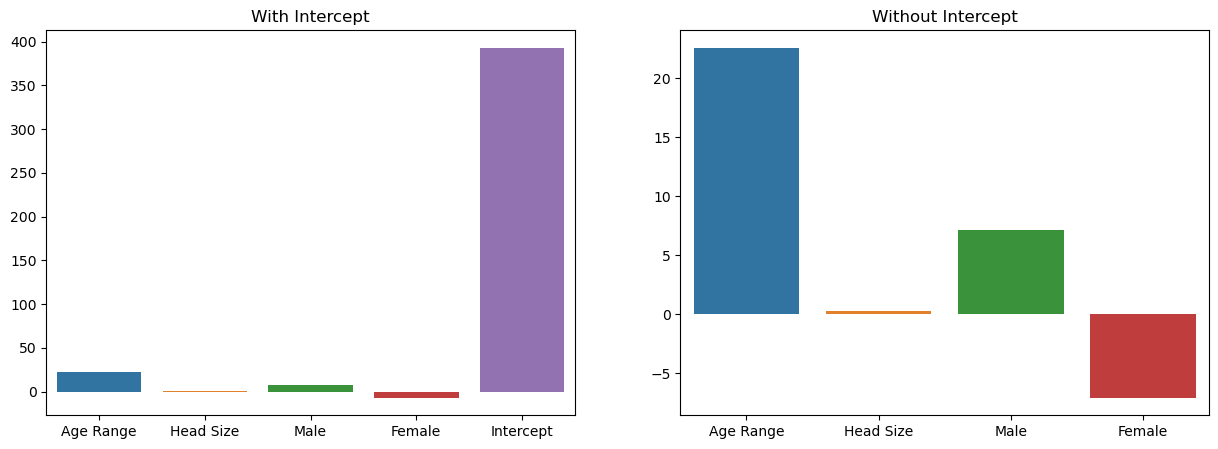

In [155]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.barplot(data = coefficients_dataframe);
plt.title('With Intercept');

plt.subplot(1,2,2)
sns.barplot(data = coefficients_dataframe[['Age Range', 'Head Size', 'Male', 'Female']]);
plt.title('Without Intercept');

In [157]:
# Evaluation
Y_pred_train = model.predict(X_train)

# Metrics
r2          = r2_score(Y_train, Y_pred_train)
mae         = mean_absolute_error(Y_train, Y_pred_train)
mse         = mean_squared_error(Y_train, Y_pred_train)
rmse        = np.sqrt(mse)
score_train = model.score(X_train, Y_train)
score_test  = model.score(X_test, Y_test)

print(f'R2 Score: {r2}')
print(f'Training Accuracy: {score_train}')
print(f'Test Accuracy: {score_test}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')

R2 Score: 0.6141102935912988
Training Accuracy: 0.6141102935912988
Test Accuracy: 0.7767424819420188
Mean Absolute Error: 57.11323529480088
Mean Square Error: 5403.78680464104
Root Mean Square Error: 73.5104537099387


This dataset comes from a medical study on a group of people, containing variations in head sizes, brain masses, and additional information like gender and age group. The goal is to build a model that predicts brain mass using these features. After training the model, it was evaluated on unseen data and achieved an accuracy (R² score) of about 77%, meaning the model can explain 77% of the variation in brain mass. This shows the model performs well in predicting brain weights based on the given data.